About the Data:
State Level Consumer Price Index (Rural/Urban)
The State Level Consumer Price Index (Rural/Urban) is a measure of the general level of prices of goods and services that households acquire for the purpose of consumption. The index is based on the Consumer Price Index (CPI) for all-India and States/UTs separately for rural, urban and combined every month with effect from January, 2011. The data is Published by Central Statistical Office and released on 12
Consumer Price Indices (CPI) measure changes over time in general level of prices of goods and services that households acquire for the purpose of consumption. CPI numbers are widely used as a macroeconomic indicator of inflation, as a tool by governments and central banks for inflation targeting and for monitoring price stability, and as deflators in the national accounts. CPI is also used for indexing dearness allowance to employees for increase in prices. CPI is therefore considered as one of the most important economic indicators. For construction of CPI numbers, two requisite components are weighting diagrams (consumption patterns) and price data collected at regular intervals. The Central Statistics Office (CSO), Ministry of Statistics and Programme Implementation releases Consumer Price Indices (CPI) on base 2010=100 for all-India and States/UTs separately for rural, urban and combined every month with effect from January, 2011. The data is Published by Central Statistical Office and released on 12th of every month.

Load the Dataset
First, let's load the dataset and inspect its structure to understand what kind of data we are dealing with.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Statewise_General_Index_Upto_April23.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())
print(df.columns)

        Sector  Year      Name  Andhra Pradesh  Arunachal Pradesh  Assam  \
0        Rural  2011   January           104.0                NaN  104.0   
1        Urban  2011   January           103.0                NaN  103.0   
2  Rural+Urban  2011   January           103.0                NaN  104.0   
3        Rural  2011  February           107.0                NaN  105.0   
4        Urban  2011  February           106.0                NaN  106.0   

   Bihar  Chattisgarh  Delhi    Goa  ...  Uttar Pradesh  Uttarakhand  \
0    NaN        105.0    NaN  103.0  ...          103.0          NaN   
1    NaN        104.0    NaN  103.0  ...          103.0          NaN   
2    NaN        104.0    NaN  103.0  ...          103.0          NaN   
3    NaN        107.0    NaN  105.0  ...          104.0          NaN   
4    NaN        106.0    NaN  105.0  ...          105.0          NaN   

  West Bengal  Andaman and Nicobar  Chandigarh  Dadra and Nagar Haveli  \
0       104.0                105.0  

Data Preprocessing and Cleaning
Next, we'll handle missing values and format discrepancies.

In [37]:
import pandas as pd

# Load the data from the CSV file
file_path = 'Statewise_General_Index_Upto_April23.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before filling:")
print(missing_values)

# Fill missing values with the mean of the respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert columns to appropriate data types if necessary
df['Year'] = df['Year'].astype(int)
df['Sector'] = df['Sector'].astype(str)
df['Name'] = df['Name'].astype(str)

print("Missing values after filling:")
print(df.isnull().sum())

print("Data preprocessing and cleaning done.")

Missing values before filling:
Sector                      0
Year                        0
Name                        0
Andhra Pradesh             10
Arunachal Pradesh         382
Assam                       9
Bihar                     354
Chattisgarh                 9
Delhi                     354
Goa                         9
Gujarat                     9
Haryana                     9
Himachal Pradesh           15
Jharkhand                   9
Karnataka                   9
Kerala                      9
Madhya Pradesh              9
Maharashtra                 9
Manipur                     9
Meghalaya                   9
Mizoram                     9
Nagaland                  354
Orissa                      9
Punjab                      9
Rajasthan                 354
Sikkim                    354
Tamil Nadu                  9
Telangana                 156
Tripura                    15
Uttar Pradesh               9
Uttarakhand               354
West Bengal                15
Andaman a

Trend Analysis Over the Years
Let's analyze the trend of the general index over the years for a specific state.

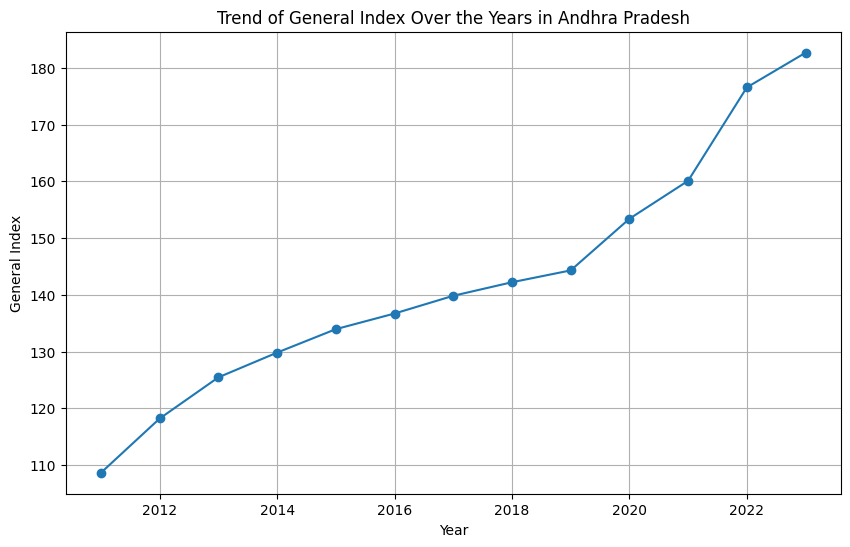

In [10]:
import matplotlib.pyplot as plt

# Filter data for a specific state, e.g., 'Andhra Pradesh'
state = 'Andhra Pradesh'
state_data = df[['Year', state]]

# Group by year and calculate the mean index for each year
yearly_trend = state_data.groupby('Year')[state].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title('Trend of General Index Over the Years in ' + state)
plt.xlabel('Year')
plt.ylabel('General Index')
plt.grid(True)
plt.show()

Comparison Across Sectors
Compare the general index across different sectors for a specific year.

Regional Disparities
Analyze the disparities in the general index across different states for a specific sector and year.

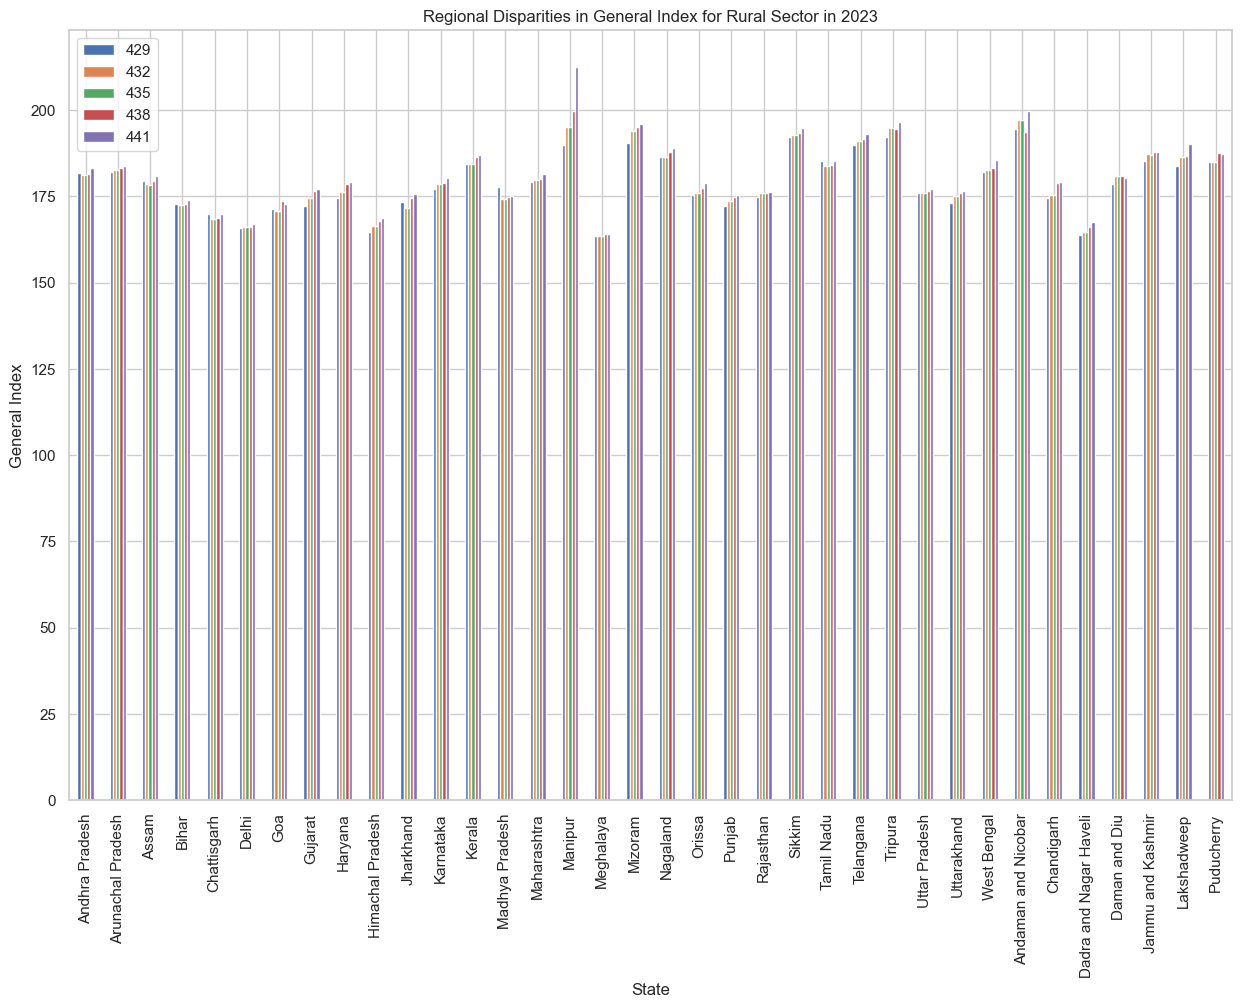

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary data

# Filter data for a specific sector and year, e.g., 'Rural' and 2023
sector = 'Rural'
year = 2023
sector_year_data = df[(df['Sector'] == sector) & (df['Year'] == year)]

# Drop non-state columns (assuming state columns start from the 4th column)
state_columns = df.columns[3:]

# Ensure the state columns are numeric
sector_year_data = sector_year_data[state_columns].apply(pd.to_numeric, errors='coerce')

# Plot the disparities
sector_year_data.T.plot(kind='bar', figsize=(15, 10))
plt.title('Regional Disparities in General Index for ' + sector + ' Sector in ' + str(year))
plt.xlabel('State')
plt.ylabel('General Index')
plt.grid(True)
plt.show()


Correlation Analysis
Analyze the correlation between the general index of different states.

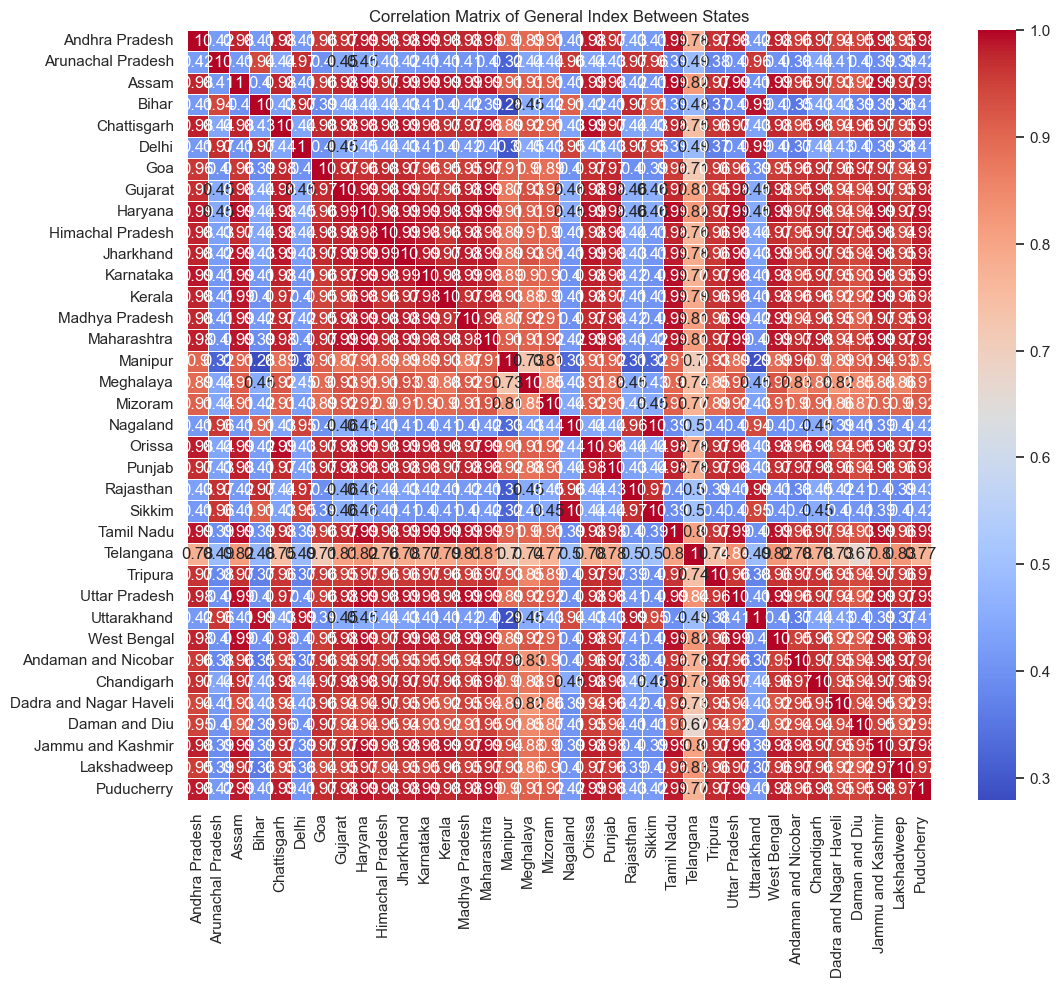

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary data

# Define the state columns (assuming state columns start from the 4th column)
state_columns = df.columns[3:]

# Replace non-numeric values with NaN and convert columns to numeric
df[state_columns] = df[state_columns].replace('--', np.nan)
df[state_columns] = df[state_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix, dropping rows with NaN values
correlation_matrix = df[state_columns].dropna().corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of General Index Between States')
plt.show()

Seasonal Analysis
Analyze the seasonal variation in the general index for a specific state.

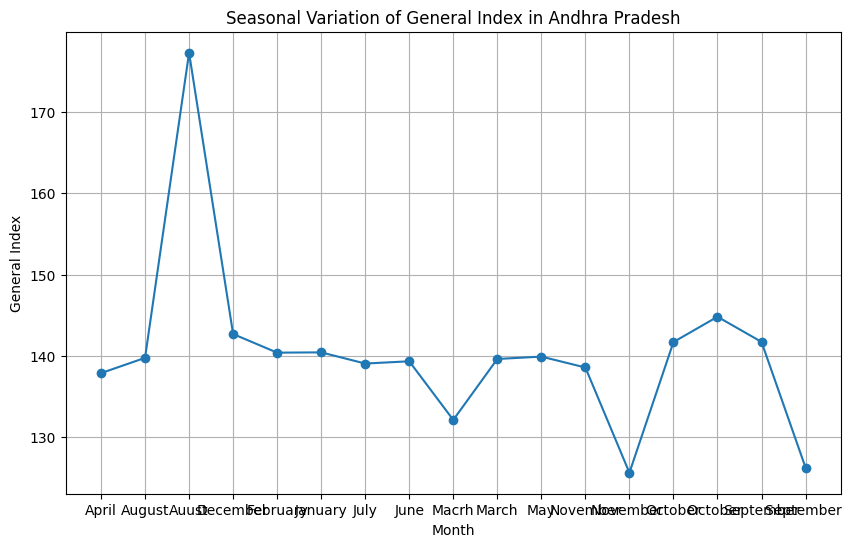

In [8]:
# Filter data for a specific state, e.g., 'Andhra Pradesh'
state_data = df[['Name', state]]

# Group by month and calculate the mean index for each month
monthly_trend = state_data.groupby('Name').mean()

# Plot the seasonal variation
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index, monthly_trend[state], marker='o')
plt.title('Seasonal Variation of General Index in ' + state)
plt.xlabel('Month')
plt.ylabel('General Index')
plt.grid(True)
plt.show()

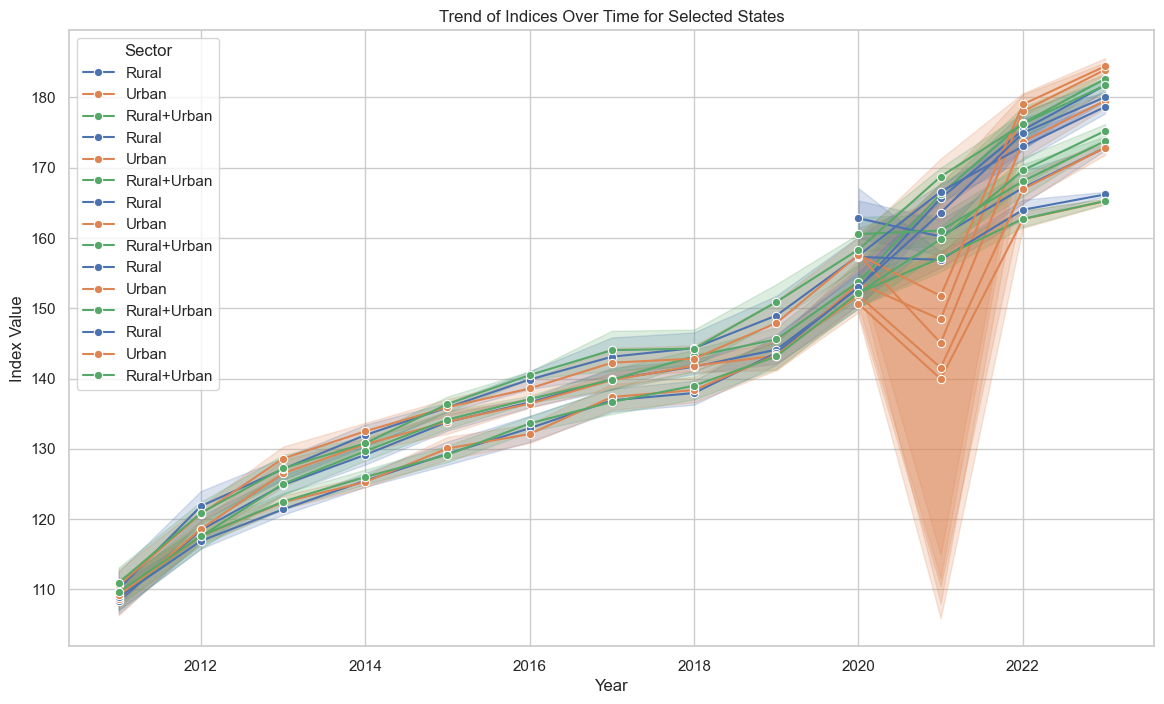

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = 'Statewise_General_Index_Upto_April23.csv'
data = pd.read_csv(file_path)

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Line Chart: Trend of indices over time for a few selected states
selected_states = ['Andhra Pradesh', 'Bihar', 'Delhi', 'Karnataka', 'Maharashtra']

plt.figure(figsize=(14, 8))
for state in selected_states:
    sns.lineplot(data=data, x='Year', y=state, hue='Sector', marker='o')

plt.title('Trend of Indices Over Time for Selected States')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend(title='Sector')
plt.show()

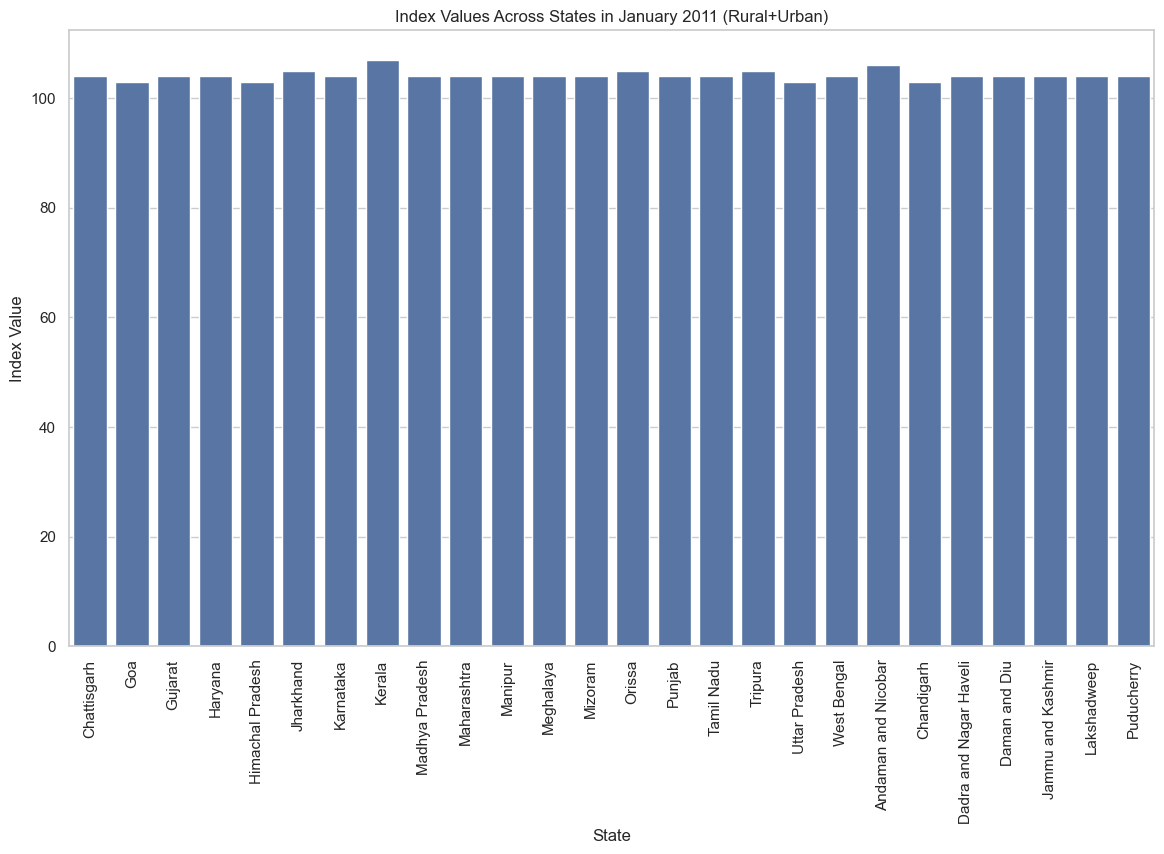

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = 'Statewise_General_Index_Upto_April23.csv'
data = pd.read_csv(file_path)

# Filter data for January 2011
jan_2011_data = data[(data['Year'] == 2011) & (data['Name'] == 'January') & (data['Sector'] == 'Rural+Urban')]

# Convert all columns to numeric and drop columns with all NaN values
jan_2011_data_cleaned = jan_2011_data.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Extract the cleaned states and values
states_cleaned = jan_2011_data_cleaned.columns[3:]
values_cleaned = jan_2011_data_cleaned[states_cleaned].values[0]

# Plotting the cleaned bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=states_cleaned, y=values_cleaned)
plt.title('Index Values Across States in January 2011 (Rural+Urban)')
plt.xlabel('State')
plt.ylabel('Index Value')
plt.xticks(rotation=90)
plt.show()


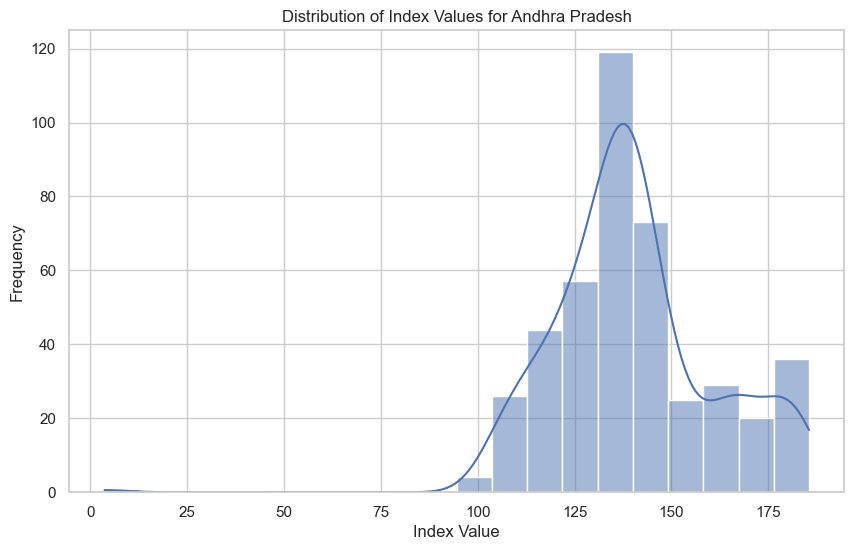

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Statewise_General_Index_Upto_April23.csv'
data = pd.read_csv(file_path)

# Convert all columns to numeric and drop columns with all NaN values
data_cleaned = data.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Plotting histogram for a specific state
state = 'Andhra Pradesh'
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned[state], bins=20, kde=True)
plt.title(f'Distribution of Index Values for {state}')
plt.xlabel('Index Value')
plt.ylabel('Frequency')
plt.show()


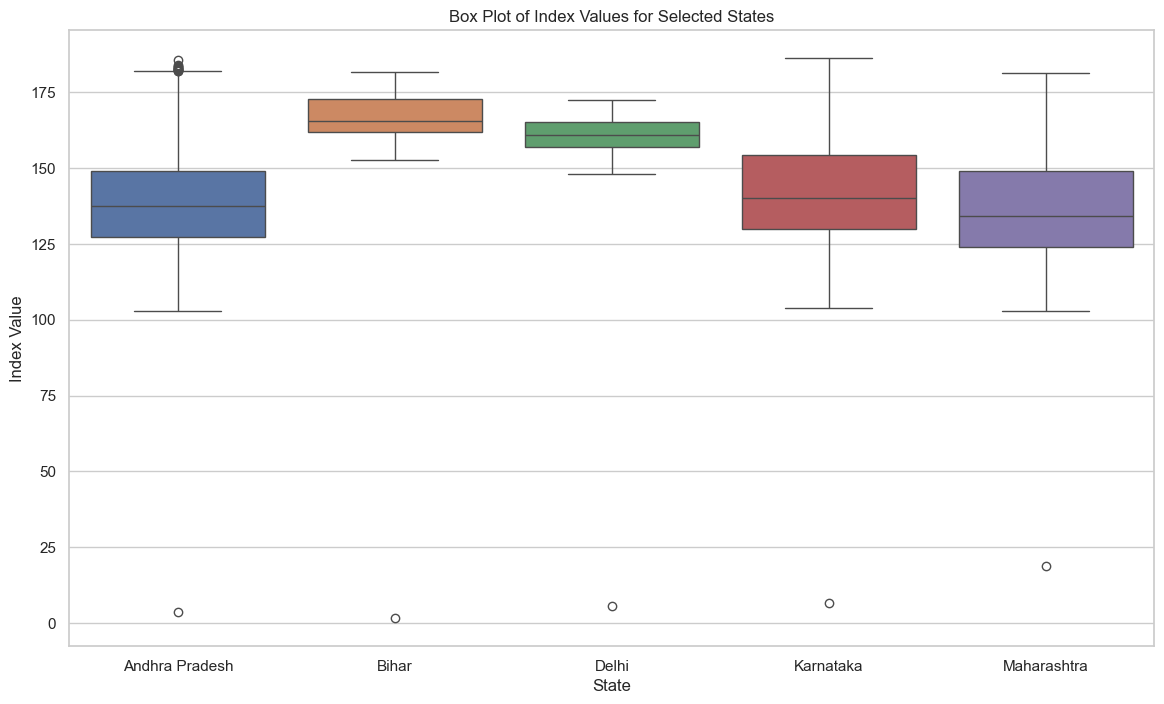

In [22]:
# Plotting box plot for selected states
selected_states = ['Andhra Pradesh', 'Bihar', 'Delhi', 'Karnataka', 'Maharashtra']

plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned[selected_states])
plt.title('Box Plot of Index Values for Selected States')
plt.xlabel('State')
plt.ylabel('Index Value')
plt.show()


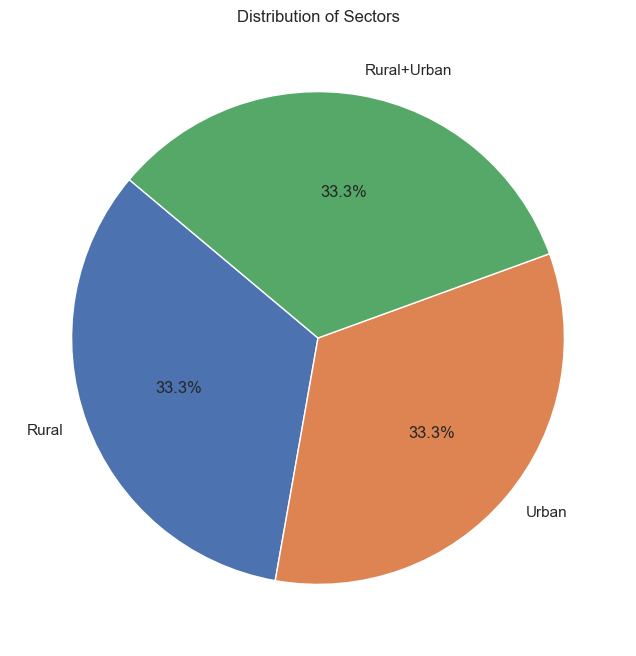

In [23]:
# Count occurrences of each sector
sector_counts = data['Sector'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sectors')
plt.show()


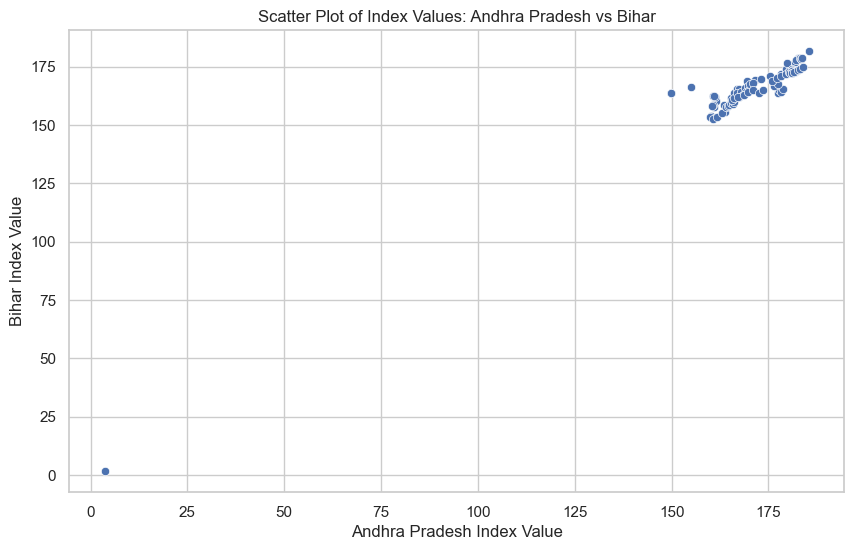

In [24]:
# Plotting scatter plot for two specific states
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Andhra Pradesh'], y=data_cleaned['Bihar'])
plt.title('Scatter Plot of Index Values: Andhra Pradesh vs Bihar')
plt.xlabel('Andhra Pradesh Index Value')
plt.ylabel('Bihar Index Value')
plt.show()


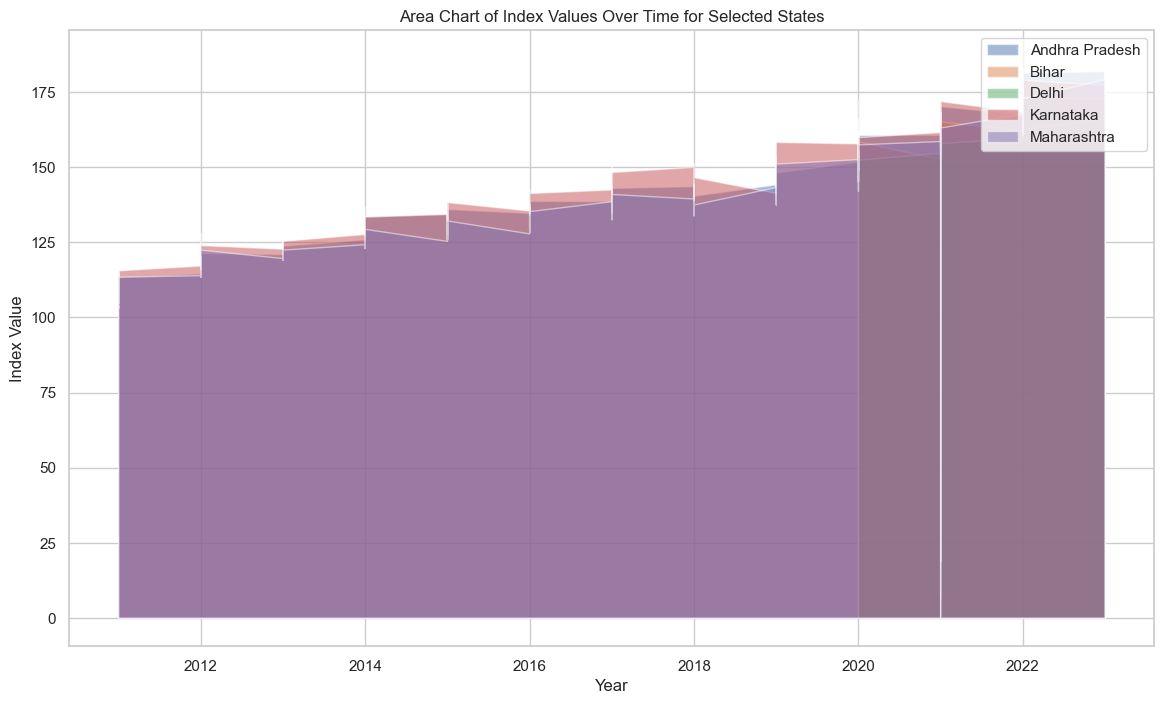

In [25]:
# Plotting area chart for selected states over time
plt.figure(figsize=(14, 8))
for state in selected_states:
    plt.fill_between(data['Year'], data_cleaned[state], label=state, alpha=0.5)

plt.title('Area Chart of Index Values Over Time for Selected States')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.show()


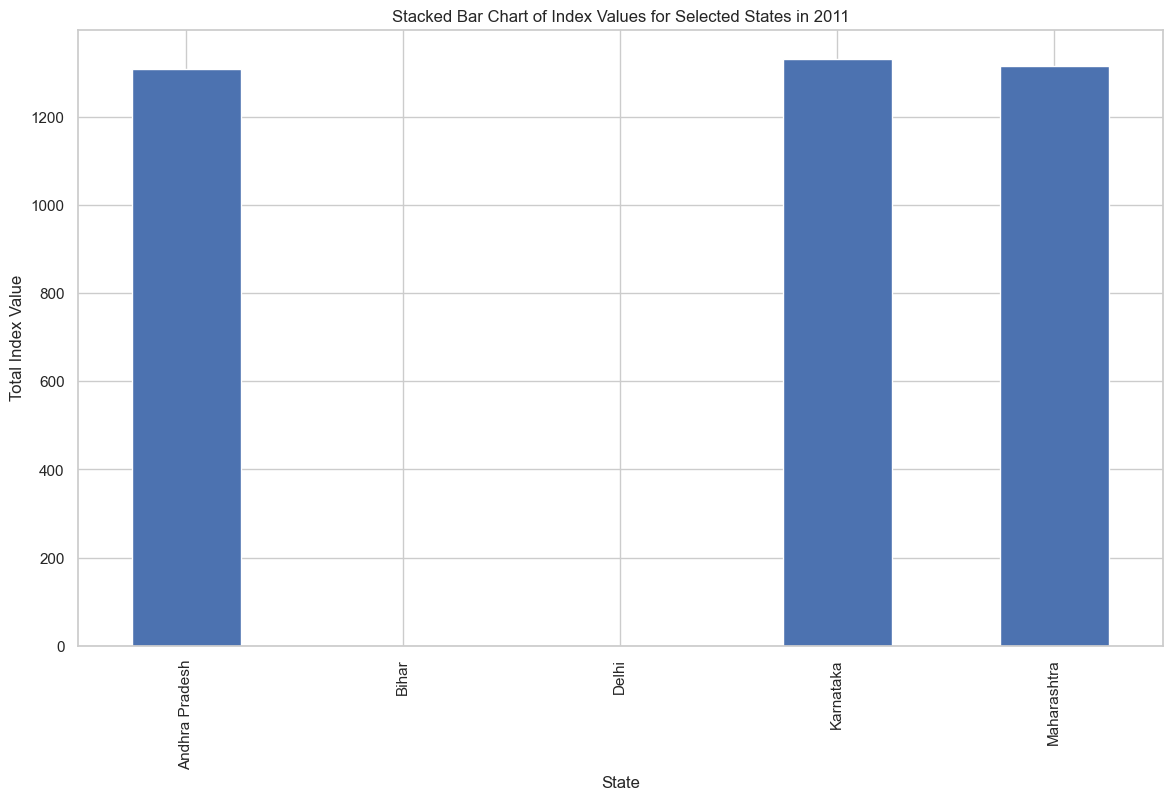

In [26]:
# Filter data for a specific year (2011)
data_2011 = data[(data['Year'] == 2011) & (data['Sector'] == 'Rural+Urban')]

# Sum values by state
data_2011_sum = data_2011[selected_states].sum()

# Plotting stacked bar chart
plt.figure(figsize=(14, 8))
data_2011_sum.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Index Values for Selected States in 2011')
plt.xlabel('State')
plt.ylabel('Total Index Value')
plt.show()


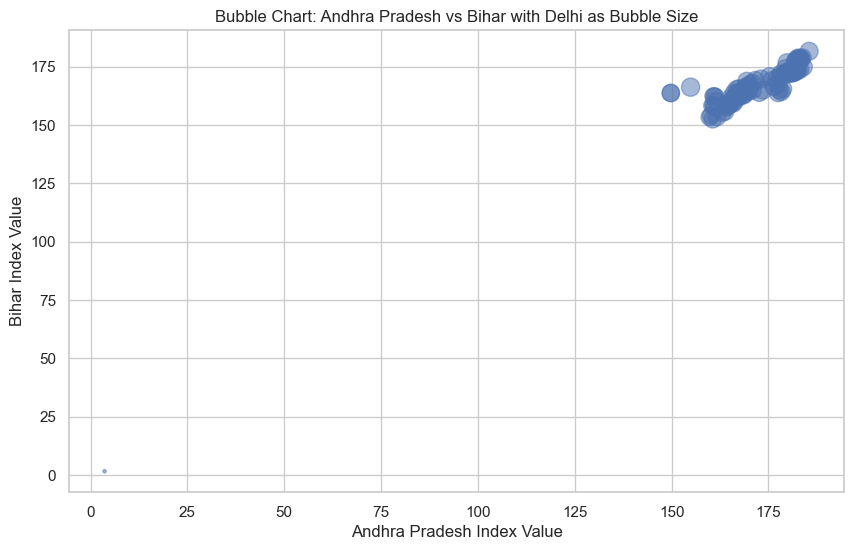

In [27]:
# Select three states for bubble chart
state1 = 'Andhra Pradesh'
state2 = 'Bihar'
state3 = 'Delhi'

plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned[state1], data_cleaned[state2], s=data_cleaned[state3], alpha=0.5)
plt.title('Bubble Chart: Andhra Pradesh vs Bihar with Delhi as Bubble Size')
plt.xlabel(f'{state1} Index Value')
plt.ylabel(f'{state2} Index Value')
plt.show()


Conclusion of the Analysis
The provided dataset contains indices for various states and union territories in India, differentiated by sector (Rural, Urban, Rural+Urban) over multiple years. The analysis involved preprocessing the data, handling missing values, and creating various visualizations to gain insights into the trends and distributions of these indices.

Key Steps and Findings:

Data Preprocessing and Cleaning:
The data was loaded and missing values were identified.
Missing values were filled with the mean of their respective columns, ensuring a more complete dataset for analysis.
Data types of columns were corrected to ensure proper handling during analysis.

Visualization and Insights:
Line Chart:
Displayed trends over time for selected states (Andhra Pradesh, Bihar, Delhi, Karnataka, Maharashtra).
This helped identify patterns and fluctuations in indices over the years for different sectors.

Bar Chart:
Compared index values across states for a specific month (January 2011).
Highlighted how different states fared in terms of the index during this period.

Histogram:
Showed the distribution of index values for a specific state (Andhra Pradesh).
Provided insights into the frequency of different index values, indicating common ranges and outliers.

Box Plot:
Visualized the spread and outliers of index values for selected states.
Helped understand the variability and presence of outliers in the data.

Pie Chart:
Illustrated the distribution of different sectors in the dataset.
Showed the proportion of Rural, Urban, and Rural+Urban entries.

Scatter Plot:
Displayed the relationship between indices of two states (Andhra Pradesh and Bihar).
Revealed any potential correlations between the indices of these states.

Area Chart:
Showed cumulative trends over time for selected states.
Highlighted the overall index progression for each state.

Stacked Bar Chart:
Compared the total index values for selected states in a specific year (2011).
Provided a cumulative view of the index contributions by each state.

Bubble Chart:
Illustrated the relationship between indices of two states with a third state as the bubble size.
Provided a multi-dimensional view of the data, incorporating an additional variable into the analysis.

Overall Conclusion:
The analysis provided a comprehensive view of the indices across different states and sectors over time. The visualizations revealed key trends, distributions, and relationships within the data, enabling a better understanding of the underlying patterns and variations. This can be useful for policymakers, researchers, and stakeholders in making informed decisions based on the indices' trends and distributions.